In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as random
from scipy import stats

### Задача 1
Реализовать serial test и применить к выборке samples

In [2]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 2

In [3]:
samples = [rng() for _ in range(1000)]

In [5]:
k = 10
f_obs = np.histogram2d(samples[::2], samples[1::2],(np.linspace(0, 1, k+1),np.linspace(0, 1, k+1)))[0]
f_exp = np.full((k,k), len(samples) // (2*k*k))

f_obs, f_exp, stats.chisquare(f_obs, f_exp)


(array([[ 8.,  4.,  1.,  7.,  5.,  8.,  3.,  1.,  5.,  4.],
        [ 8.,  6.,  4.,  9.,  5.,  2.,  4.,  7.,  5.,  8.],
        [ 4.,  4.,  3.,  7.,  0.,  6.,  6.,  6.,  5.,  7.],
        [ 5.,  2.,  4.,  5.,  4.,  4.,  8.,  5.,  5.,  9.],
        [ 5.,  3.,  3., 10.,  5.,  4.,  6.,  3.,  5., 13.],
        [ 5.,  9.,  3.,  4.,  6.,  6.,  2.,  4.,  6.,  8.],
        [ 2.,  9.,  3.,  7.,  5.,  5.,  8.,  5.,  6.,  4.],
        [ 6.,  7.,  4.,  5.,  0.,  4.,  4.,  4.,  6.,  2.],
        [ 1.,  4.,  5.,  4.,  5.,  5.,  6.,  2.,  8.,  4.],
        [ 5.,  6.,  6.,  2.,  7.,  6.,  4.,  6.,  3.,  2.]]),
 array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

### Задача 3

Привести статистический тест, который покажет, что с rng_bad есть проблемы, а с rng - нет.

In [ ]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m

rng_bad.current = 1

In [ ]:
samples_bad = [rng_bad() for _ in range(30000)]
samples = [rng() for _ in range(30000)]

In [ ]:
stats.kstest(samples_bad, stats.uniform.cdf)


KstestResult(statistic=0.008437018050998446, pvalue=0.027777953265237354)

In [ ]:
stats.kstest(samples, stats.uniform.cdf)

KstestResult(statistic=0.0037562179735551315, pvalue=0.7896004657144153)

### Задача 4
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

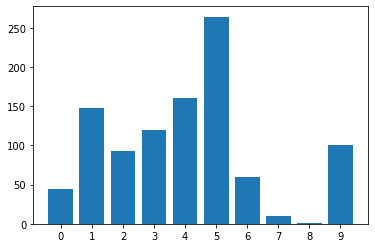

In [ ]:
def f(w, k):
    for i in range(10):
        if (k <= w[i]):
            return i

w = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
number = np.zeros(10)
w = w/w.sum()
for i in range (1, 10):
    w[i] += w[i-1]

for i in range (1000):
    number[f(w, random.random())] += 1

plt.bar(np.array([i for i in range(10)]), number)
plt.xticks(np.array([i for i in range(10)]))
plt.show()


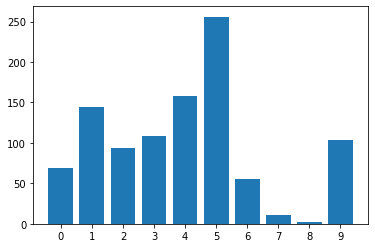

In [ ]:
def f(c, ves, k):
    for i in range(10):
        if (k <= ves[i]):
            return c[i]

w = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
number = np.zeros(10)
w = w/w.sum()
c = np.argsort(w)
w.sort()
for i in range (1, 10):
    w[i] += w[i-1]

for i in range (1000):
    number[f(c, w, random.random())] += 1

plt.bar(np.array([i for i in range(10)]), number)
plt.xticks(np.array([i for i in range(10)]))
plt.show()

### Задача 5
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$ с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

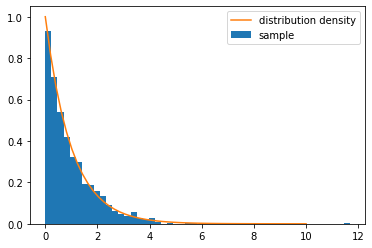

In [ ]:
L = 1
f = np.array([-np.log(1 - np.random.rand()) for j in range(1000)])

plt.hist(f,50, density=True,  label="sample")

plt.plot(np.linspace(0,10,50), L*np.exp(-L*np.linspace(0,10,50)), label="distribution density")

plt.legend()
plt.show()

### Задача 6
Обоснуйте (устно), что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из распределения с плотностью $e^xcos^2x$ на отрезке $[-\pi/2, \pi/2]$. По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

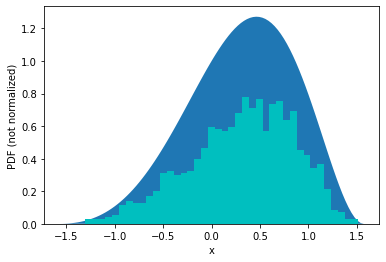

In [ ]:
def rng(k):
    point = [0,0]
    point[0] = (np.random.rand() - 0.5)*np.pi
    point[1] = np.random.rand()
    while point[1] > np.exp(point[0])*k*np.cos(point[0])**2:
      point[0] = (np.random.rand() - 0.5) * np.pi
      point[1] =  np.random.rand()
    return point

%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x)*np.cos(x)**2 # not normalized density!
k = 1/(max(density)*np.pi)
max(density)
random = [rng(k) for i in range(1000)]
randomx = [random[i][0] for i in range(1000)]
randomy = [random[i][1] for i in range(1000)]
plt.fill_between(x, 0, density)
plt.hist(randomx , bins = 40, density = True, color = 'c')
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.show()

### Задача 7
Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

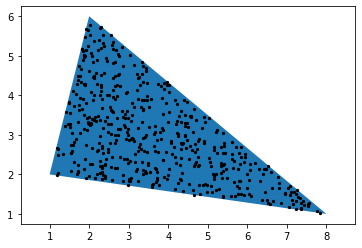

In [ ]:
%matplotlib inline
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

r1 = np.array([np.random.rand() for i in range(500)])
r2 = np.array([np.random.rand() for i in range(500)])

x = (1 + r1+ 7*r2)
y = (2 + 4*r1 - r2)

for i in range(500):
    if (r1[i]+r2[i] > 1):
        x[i] = (1 + (1- r1[i])+7*(1-r2[i]))
        y[i] = (2 + 4*(1-r1[i]) -(1-r2[i]))


fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(x,y, s=5. , color = 'black')
plt.axis('equal')
plt.show()

### Задача 8
Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

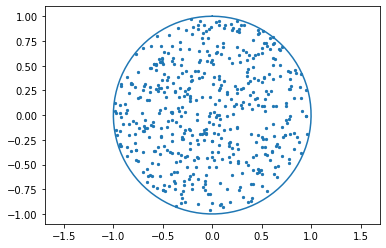

In [ ]:
%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

rt= np.array([np.random.rand() for i in range(500)])
rr= np.array([np.random.rand() for i in range(500)])
theta = rt * 2 * np.pi
r = np.sqrt(rr)
plt.scatter(r*np.sin(theta),r*np.cos(theta), s = 5.)

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

### Задача 9
Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20,  -4],
       [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

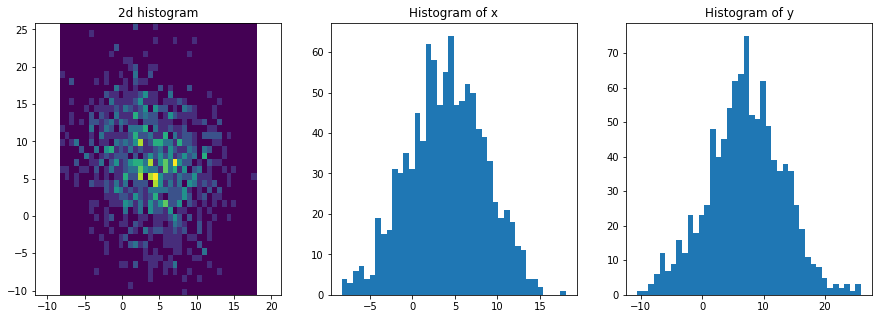

In [25]:
%matplotlib inline
from math import sqrt
n = 1000
u1, u2 = np.random.rand(2, n)*2 - 1

for i in range(n):
    while u1[i]**2 + u2[i]**2 > 1:
      u1[i], u2[i] = np.random.rand(2) * 2 - 1

s = u1**2 + u2**2
z_0 = u1 * np.sqrt(- 2 * np.log(s)/s)
z_1 = u2 * np.sqrt(- 2 * np.log(s)/s)
#A*ksi+B = N(B, AA^T)
x = -2 * z_0 + 4 * z_1 + 4
y = 6 * z_0 + 2 * z_1 + 7

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(x, y, bins=40)
ax[0].axis('equal')
ax[1].hist(x, bins=40)
ax[2].hist(y, bins=40)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()